BUSINESS UNDERSTANDING

1.1 INTRODUCTION

An algorithm is a sequence of instructions that are used to solve a specific tasks and are understood by the computer. Predictive algorithms are used to make prediction on certain tasks e.g in Netflix, predictive algorithms are used to recommend movies that you would like based on your previous viewing history. To create this predictive algorithm I will have to analyse the data using exploratory data analysis in order to identify patterns, spot anomalies and test hypotheses so that I can  transform the data into information to be used by the algorithm

1.2 PROJECT OVERVIEW

Spotify has become widespread and it is the dominant streaming service in the market followed by Apple Music. In order to keep it on top we will have to increase the user experience. This is where the predictive algorithm will come in to play. The algorithm will suggest personalised music and podcasts tailored to the user for their enjoyment. 

1.3 BUSINESS PROBLEM

To increase user engagement in the competitive market we need:
A. Keep users engaged in streaming which increases revenue
B. Prevent users from leaving the platform and use competitors platforms
C. Help users discover new content
D. Attract new users to the platform

1.4 OBJECTIVES

A. Use EDA to understand data used for the algorithm  
B. Accommodate new genres in music
C. Personalise music and podcast recommendations tailored to individual preferences  


1.5 STAKEHOLDERS

A. Stock investors
B. Data scientists and analysts involved in the project
C. Artists and content creators
D. Technology vendors 


2 DATA PREPARATION
2.1 Importing libraries

In [62]:
#import all libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

2.2 LOADING DATASETS

In [63]:
#Importing songs dataset

artist_df = pd.read_csv("data_by_artist.csv")
genre_df = pd.read_csv("data_by_genres.csv")
year_df = pd.read_csv("data_by_year.csv")


Check if the datasets have been imported

In [64]:
artist_df.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [65]:
genre_df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [66]:
year_df.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


3 DATA UNDERSTANDING
3.1 ANALYZING THE DATASET

In [67]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


The artist dataframe has 15 columns and each column has 28680 data entries with 3 columns having integer datatype, 1 with object data type and 12 with float datatypes

In [68]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


The genre dataframe has 14 columns each with 2973 non null entries.
It has 11 columns with float datatype, 2 columns with integer datatype and 1 column with object datatype

In [69]:
year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


The year dataframe has 14 columns each with 100 non null entries.
It has 11 columns with float datatype, 3 columns with integer datatype 

3.2 DESCRIBING THE DATASETS

In [70]:
artist_df.describe

<bound method NDFrame.describe of        mode  count  acousticness  \
0         1      9      0.590111   
1         1     26      0.862538   
2         1      7      0.856571   
3         1     27      0.884926   
4         1      7      0.510714   
...     ...    ...           ...   
28675     1      2      0.512000   
28676     0      2      0.541000   
28677     1     11      0.785455   
28678     1      2      0.381000   
28679     1      2      0.568000   

                                                 artists  danceability  \
0                       "Cats" 1981 Original London Cast      0.467222   
1                              "Cats" 1983 Broadway Cast      0.441731   
2            "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3         "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4      "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   
...                                                  ...           ...   
28675          

The artist dataset has 28680 rows and 15 columns

In [71]:
genre_df.describe

<bound method NDFrame.describe of       mode                  genres  acousticness  danceability   duration_ms  \
0        1  21st century classical      0.979333      0.162883  1.602977e+05   
1        1                   432hz      0.494780      0.299333  1.048887e+06   
2        1                   8-bit      0.762000      0.712000  1.151770e+05   
3        1                      []      0.651417      0.529093  2.328809e+05   
4        1              a cappella      0.676557      0.538961  1.906285e+05   
...    ...                     ...           ...           ...           ...   
2968     1                    zolo      0.222625      0.547082  2.580991e+05   
2969     0                 zouglou      0.161000      0.863000  2.063200e+05   
2970     1                    zouk      0.263261      0.748889  3.060728e+05   
2971     0            zurich indie      0.993000      0.705667  1.984173e+05   
2972     1                  zydeco      0.421038      0.629409  1.716717e+05   

     

The genre dataset has 2973 rows and 14 columns

In [72]:
year_df.describe

<bound method NDFrame.describe of     mode  year  acousticness  danceability    duration_ms    energy  \
0      1  1921      0.886896      0.418597  260537.166667  0.231815   
1      1  1922      0.938592      0.482042  165469.746479  0.237815   
2      1  1923      0.957247      0.577341  177942.362162  0.262406   
3      1  1924      0.940200      0.549894  191046.707627  0.344347   
4      1  1925      0.962607      0.573863  184986.924460  0.278594   
..   ...   ...           ...           ...            ...       ...   
95     1  2016      0.284171      0.600202  221396.510295  0.592855   
96     1  2017      0.286099      0.612217  211115.696787  0.590421   
97     1  2018      0.267633      0.663500  206001.007133  0.602435   
98     1  2019      0.278299      0.644814  201024.788096  0.593224   
99     1  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0           0.344878  0.205710 -1

The year dataset has 100 rows and 14 columns

4 DATA CLEANING

4.1 CHECKING NULLS

In [73]:
# check for null values using 'isnull'
null_values = artist_df.isnull()
null_values.sum()

mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

There are no null values in any of the artist dataframe columns

In [74]:
# check for null values using 'isnull'
null_values = genre_df.isnull()
null_values.sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

There are no null values in any of the genres dataframe columns

In [75]:
# check for null values using 'isnull'
null_values = year_df.isnull()
null_values.sum()

mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

There are no null values in any of the year dataframe columns

4.2 CHECK FOR DUPLICATES

In [76]:
artist_df.duplicated().sum()

0

There are no dulicated rows in the artists dataframe

In [77]:
genre_df.duplicated().sum()

0

There are no dulicated rows in the genre dataframe

In [78]:
year_df.duplicated().sum()

0

There are no duplicated rows in the year dataframe

5 DATA VISUALISATION

In [79]:
#Find Corellation
year_df.corr()  

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,1.000000,-0.920184,0.495913,0.518722,0.932681,-0.841503,-0.614372,0.924476,-0.382840,0.794034,-0.195443,0.974517,-0.047740
acousticness,NaN,-0.920184,1.000000,-0.569333,-0.554853,-0.966941,0.875157,0.512743,-0.862492,0.272147,-0.860516,-0.037674,-0.945010,-0.076447
danceability,NaN,0.495913,-0.569333,1.000000,-0.126474,0.538292,-0.476947,-0.384653,0.595862,0.266629,0.603543,0.242717,0.560226,0.179367
duration_ms,NaN,0.518722,-0.554853,-0.126474,1.000000,0.575664,-0.425268,-0.228064,0.446172,-0.544206,0.437509,-0.050771,0.484321,0.128262
energy,NaN,0.932681,-0.966941,0.538292,0.575664,1.000000,-0.844761,-0.500540,0.933191,-0.420854,0.902943,0.092576,0.953637,0.071746
instrumentalness,NaN,-0.841503,0.875157,-0.476947,-0.425268,-0.844761,1.000000,0.489357,-0.800334,0.273937,-0.793371,-0.051677,-0.872021,0.131505
liveness,NaN,-0.614372,0.512743,-0.384653,-0.228064,-0.500540,0.489357,1.000000,-0.522916,0.332920,-0.434890,0.266866,-0.623418,0.107720
loudness,NaN,0.924476,-0.862492,0.595862,0.446172,0.933191,-0.800334,-0.522916,1.000000,-0.398779,0.853266,0.027468,0.928369,-0.020220
speechiness,NaN,-0.382840,0.272147,0.266629,-0.544206,-0.420854,0.273937,0.332920,-0.398779,1.000000,-0.391702,-0.059108,-0.398338,0.139448


This gives the correlation between different columns which can be helpful in making of graphs

In [80]:
#Find mean of values in each column
year_mean = year_df.mean().abs()
print(year_mean)

mode                     1.000000
year                  1970.500000
acousticness             0.556317
danceability             0.536783
duration_ms         227296.752234
energy                   0.452705
instrumentalness         0.193582
liveness                 0.208224
loudness                11.969054
speechiness              0.105861
tempo                  116.015674
valence                  0.532120
popularity              27.376065
key                      3.790000
dtype: float64


The abs function is to remove negative values from the mean for a better plot

In [81]:
#Find Standard deviation
year_df.std()

mode                    0.000000
year                   29.011492
acousticness            0.275358
danceability            0.052356
duration_ms         25630.048065
energy                  0.161738
instrumentalness        0.122488
liveness                0.017903
loudness                3.105610
speechiness             0.082128
tempo                   5.669645
valence                 0.057809
popularity             20.703197
key                     3.562700
dtype: float64

After finding mean and standard deviation of each column in the year dataset we can plot a visible graph 

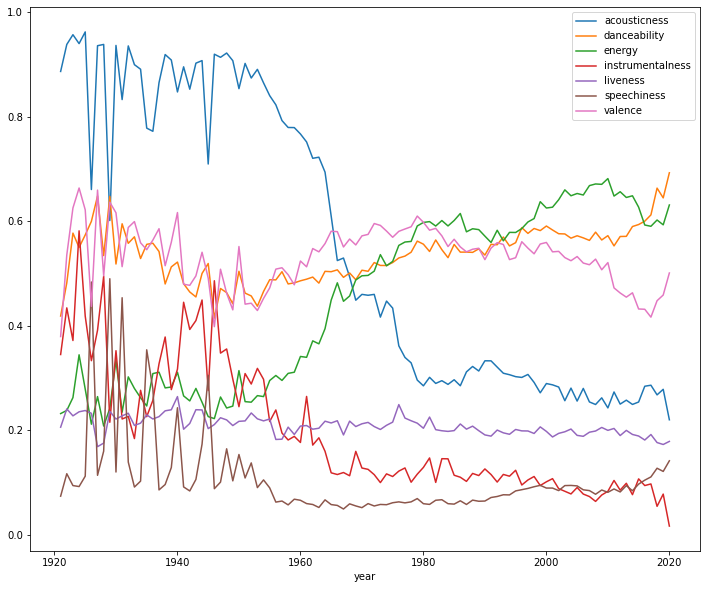

In [82]:
col= []

for name, value in year_mean.items():       ##Get column names with mean values less than one and append them to a list
    if value < 1:
        col.append(name)
year_df.plot(x= "year", y=col, kind='line', figsize=(12,10))

plt.show()

Plotting year against columns with values less than 1 helps to create a graph that can be easily understood

In [83]:
#genre dataset mean
genre_mean = genre_df.mean().abs()

In [84]:
genre_df.corr()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,1.000000,0.077347,-0.071240,-0.053197,-0.080352,-0.012662,-0.002650,-0.063706,-0.059127,-0.042931,-0.010258,-0.031231,-0.060109
acousticness,0.077347,1.000000,-0.324991,-0.014075,-0.868274,0.273739,-0.076570,-0.737276,-0.086139,-0.397713,-0.178210,-0.458698,-0.078815
danceability,-0.071240,-0.324991,1.000000,-0.160634,0.299780,-0.383102,-0.055147,0.453062,0.242052,0.082869,0.652546,0.217992,0.029551
duration_ms,-0.053197,-0.014075,-0.160634,1.000000,-0.048158,0.229421,0.018624,-0.137574,0.033226,-0.046840,-0.257517,-0.071019,-0.029309
energy,-0.080352,-0.868274,0.299780,-0.048158,1.000000,-0.324940,0.168233,0.848965,0.119791,0.430825,0.305166,0.337795,0.097165
instrumentalness,-0.012662,0.273739,-0.383102,0.229421,-0.324940,1.000000,-0.050615,-0.537669,-0.196763,-0.201663,-0.424091,-0.265449,-0.069317
liveness,-0.002650,-0.076570,-0.055147,0.018624,0.168233,-0.050615,1.000000,0.123946,0.190136,0.002285,0.000730,-0.094178,0.007308
loudness,-0.063706,-0.737276,0.453062,-0.137574,0.848965,-0.537669,0.123946,1.000000,0.095298,0.407985,0.376577,0.344361,0.082991
speechiness,-0.059127,-0.086139,0.242052,0.033226,0.119791,-0.196763,0.190136,0.095298,1.000000,0.001446,0.092680,-0.045217,0.022326
tempo,-0.042931,-0.397713,0.082869,-0.046840,0.430825,-0.201663,0.002285,0.407985,0.001446,1.000000,0.139589,0.146717,0.081608


In [85]:
#SORT genre dataframe

genre_df.sort_values(by=['popularity'], ascending=False).head()




,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.818,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2778,0,turkish edm,0.008290,0.698,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
2533,1,south african house,0.043833,0.847,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.877,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
46,0,alberta hip hop,0.330000,0.885,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11


Sorted genre dataframe gives the 5 most popular genres for better visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

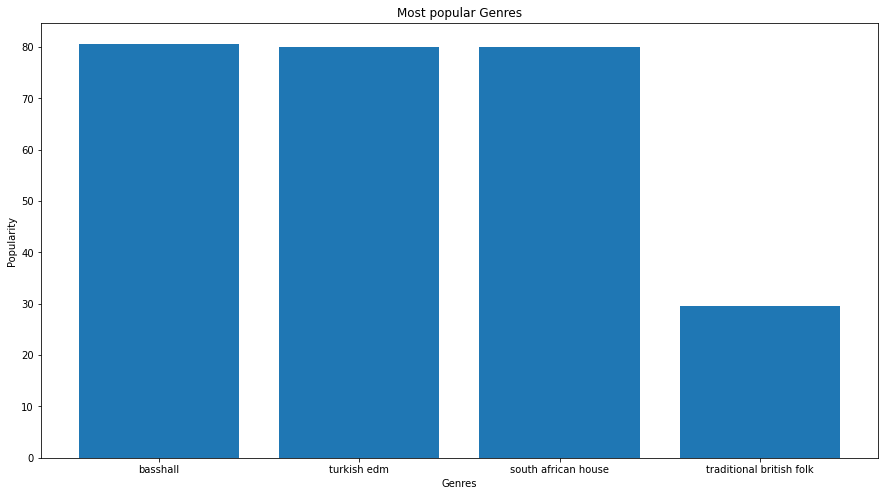

In [86]:

bashall= genre_df.loc[genre_df.index[237]]  #stores series
turkish= genre_df.loc[genre_df.index[2778]]

sa= genre_df.loc[genre_df.index[2533]]

ven= genre_df.loc[genre_df.index[2735]]

x1 = bashall['popularity']
y1 = bashall['genres']

x2 = turkish['popularity']
y2 = turkish['genres']

x3 = sa['popularity']
y3 = sa['genres']

x4 = ven['popularity']
y4 = ven['genres']
plt.figure(figsize=(15,8))

yaxis = [x1,x2,x3,x4]
xaxis= [y1,y2,y3,y4]

plt.bar(xaxis, yaxis)

plt.xlabel("Genres") #Bar grapg consists of two variable
plt.ylabel("Popularity")

plt.title("Most popular Genres")


plt.show





The graph shows the most popular genres from a scale of 0 to 80